In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
lines = []
with open('./driving_log.csv') as csvfile:
	reader = csv.reader(csvfile)
	for line in reader:
		lines.append(line)

In [3]:
print(lines[np.random.randint(len(lines))])

['D:\\Google Drive\\Self_driving car\\car_term1\\CNN\\CarND-Behavioral-Cloning-P3\\IMG\\center_2017_07_27_10_03_28_976.jpg', 'D:\\Google Drive\\Self_driving car\\car_term1\\CNN\\CarND-Behavioral-Cloning-P3\\IMG\\left_2017_07_27_10_03_28_976.jpg', 'D:\\Google Drive\\Self_driving car\\car_term1\\CNN\\CarND-Behavioral-Cloning-P3\\IMG\\right_2017_07_27_10_03_28_976.jpg', '-0.0816083', '1', '0', '30.19021']


In [4]:
# Define Augmentation functinos

# change the size of the image
def change_size_and_normalize(image, new_row, new_col):
	image = cv2.resize(image, (new_col, new_row), interpolation=cv2.INTER_AREA)
	new_image = image/122.5 - 1
	return new_image

In [5]:
# flipping
def flipping(image, angle):
	new_image = cv2.flip(image, 1)
	new_angle = angle*(-1.0)

	return new_image, new_angle

In [6]:
# changing brightness
def brightness_change(image):
	temp = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
	temp = np.array(temp, dtype = np.float64)
	brigh_rand = .25+ np.random.uniform()
	temp[:,:,2] = temp[:,:,2] * brigh_rand
	temp[:,:,2][temp[:,:,2]>255] = 255
	temp = np.array(temp, dtype=np.uint8)
	new_image = cv2.cvtColor(temp, cv2.COLOR_HSV2RGB)

	return new_image 

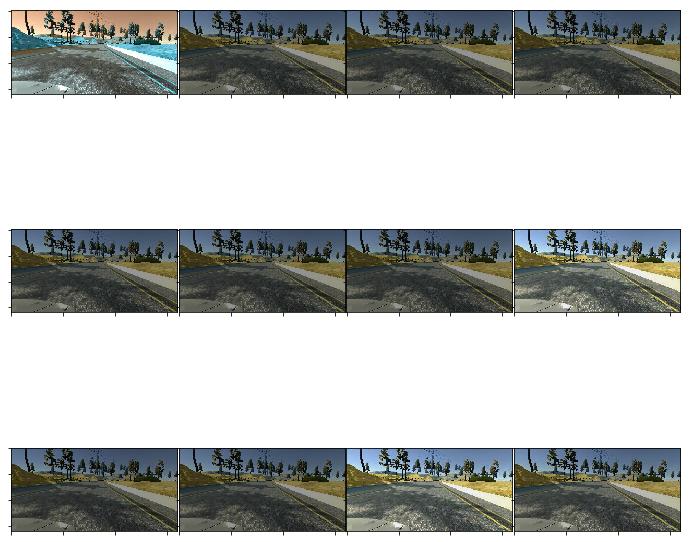

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:

# this is a funtion that is used to plot a bunch images after single preprocess
def display_img(lines, img_num):
    img_arr = []
    ang_arr = []
    line = lines[np.random.randint(len(lines))]
    camera_pos = np.random.randint(3)    
    raw_angle = float(line[3])
    ang_arr.append(raw_angle)    
    path = './IMG/' + line[camera_pos].split('\\')[-1]
    raw_img = cv2.imread(path)
    img_arr.append(raw_img)
    image = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
    for i in range(img_num):
        # run preprocess function here and append new image and new angle to arrays
        img_processed= brightness_change(image)
        ang_processed = raw_angle
        ang_arr.append(ang_processed)
        img_arr.append(img_processed)
    # plot those image both original and processed
    cols = 4
    rows = int(img_num/3+1)
    gs1 = gridspec.GridSpec(rows,cols)
    # fig, axs = plt.subplots(rows, cols)
    gs1.update(wspace=0.01,hspace=0.02)
    plt.figure(figsize=(12,12))
    for i in range(rows):
        for j in range(cols):
            axs1 = plt.subplot(gs1[i,j])
            axs1.set_xticklabels([])
            axs1.set_yticklabels([])
            axs1.set_aspect('equal')
            plt.imshow(img_arr[i+j])
    
    plt.show()
    print(ang_arr)
display_img(lines,6)

In [8]:
# translation of image along x and y axis
def translation(image, angle, trans_range):
    rows, cols, ch = image.shape
    tr_x = trans_range * np.random.uniform() - trans_range/2
    tr_y = 40 * np.random.uniform() - 40/2
    trans_mat = np.float32([[1,0,tr_x],[0,1,tr_y]])
    new_angle = angle + tr_x/trans_range*2*.2
    new_image = cv2.warpAffine(image, trans_mat, (cols, rows))

    return new_image, new_angle

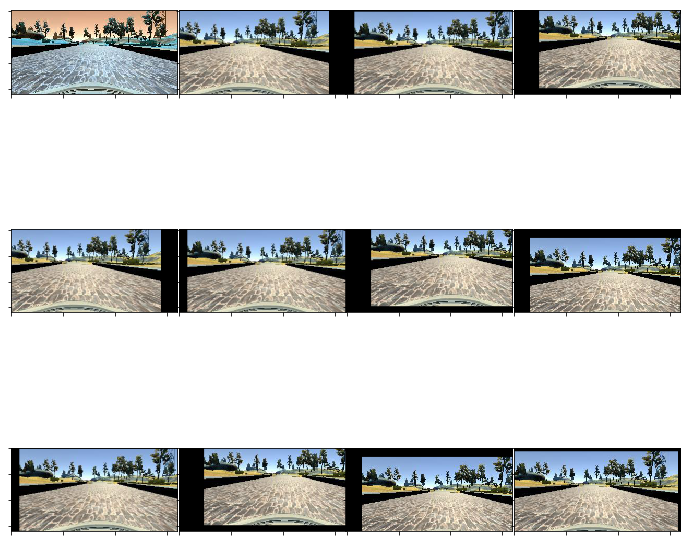

[0.0, -0.12994469959352728, 0.06529880098762289, 0.19246062690013338, 0.12386603291647823, -0.019976115084426344, -0.013079315461102909]


In [9]:

# this is a funtion that is used to plot a bunch images after single preprocess
def display_img(lines, img_num):
    img_arr = []
    ang_arr = []
    line = lines[np.random.randint(len(lines))]
    camera_pos = np.random.randint(3)    
    raw_angle = float(line[3])
    ang_arr.append(raw_angle)    
    path = './IMG/' + line[camera_pos].split('\\')[-1]
    raw_img = cv2.imread(path)
    img_arr.append(raw_img)
    image = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
    for i in range(img_num):
        # run preprocess function here and append new image and new angle to arrays
        img_processed, ang_processed = translation(image, raw_angle,100)
        ang_arr.append(ang_processed)
        img_arr.append(img_processed)
    # plot those image both original and processed
    cols = 4
    rows = int(img_num/3+1)
    gs1 = gridspec.GridSpec(rows,cols)
    # fig, axs = plt.subplots(rows, cols)
    gs1.update(wspace=0.01,hspace=0.02)
    plt.figure(figsize=(12,12))
    for i in range(rows):
        for j in range(cols):
            axs1 = plt.subplot(gs1[i,j])
            axs1.set_xticklabels([])
            axs1.set_yticklabels([])
            axs1.set_aspect('equal')
            plt.imshow(img_arr[i+j])
    
    plt.show()
    print(ang_arr)
display_img(lines,6)

In [10]:
 # add shadows 
def add_shadow(image):
    top_y = 320*np.random.uniform()
    bot_y = 320*np.random.uniform()
    top_x = 0
    bot_x = 160
    image = np.array(image, dtype=np.float32)
    image_hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0], 0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0], 0:image.shape[1]][1]

    shadow_mask[((X_m-top_x)*(bot_y-top_y) - (bot_x-top_x)*(Y_m-top_y) >=0)] = 1
    if np.random.randint(2) == 1:
        random_bright = .5
        cond1 = shadow_mask == 1
        cond0 = shadow_mask == 0
        if np.random.randint(2) == 1:
            image_hls[:,:,1][cond1] == image_hls[:,:,1][cond1]*random_bright
        else:
            image_hls[:,:,1][cond0] == image_hls[:,:,1][cond0]*random_bright
    new_image = cv2.cvtColor(image_hls, cv2.COLOR_HLS2RGB) 
    
    return new_image

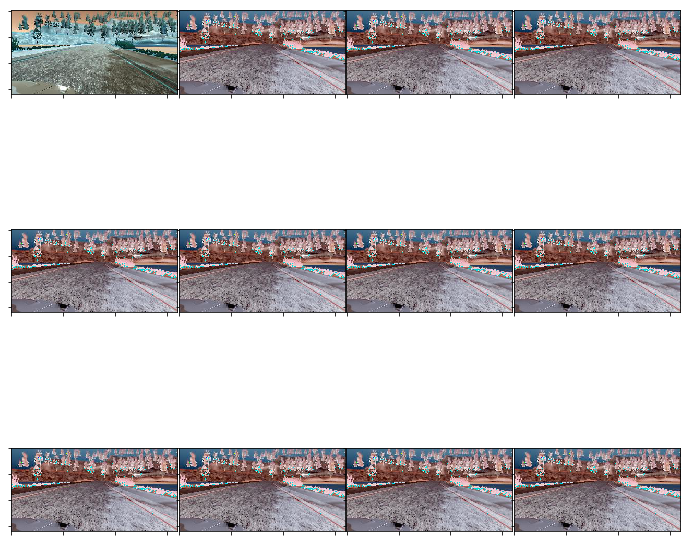

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
# this is a funtion that is used to plot a bunch images after single preprocess
def display_img(lines, img_num):
    img_arr = []
    ang_arr = []
    line = lines[np.random.randint(len(lines))]
    camera_pos = np.random.randint(3)    
    raw_angle = float(line[3])
    ang_arr.append(raw_angle)    
    path = './IMG/' + line[camera_pos].split('\\')[-1]
    raw_img = cv2.imread(path)
    img_arr.append(raw_img)
    for i in range(img_num):
        # run preprocess function here and append new image and new angle to arrays
        img_processed= add_shadow(raw_img)
        ang_processed = raw_angle
        ang_arr.append(ang_processed)
        img_arr.append(img_processed)
    # plot those image both original and processed
    cols = 4
    rows = int(img_num/3+1)
    gs1 = gridspec.GridSpec(rows,cols)
    # fig, axs = plt.subplots(rows, cols)
    gs1.update(wspace=0.01,hspace=0.02)
    plt.figure(figsize=(12,12))
    for i in range(rows):
        for j in range(cols):
            axs1 = plt.subplot(gs1[i,j])
            axs1.set_xticklabels([])
            axs1.set_yticklabels([])
            axs1.set_aspect('equal')
            plt.imshow(img_arr[i+j])
    
    plt.show()
    print(ang_arr)
display_img(lines,6)

In [12]:
# preprocessing procedure for a single image
def preprocess_img(line, new_row, new_col, correction):
    camera_pos = np.random.randint(3)
    angle = float(line[3])
    path = './IMG/' + line[camera_pos].split('\\')[-1]
    if camera_pos == 1:
        angle = angle + correction
    if camera_pos == 2:
        angle = angle - correction
    image = np.array(cv2.imread(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = brightness_change(image)
    image, angle = translation(image, angle, 100)
    image = change_size_and_normalize(image, new_row, new_col)
    '''plt.imshow(image)
    plt.show()
    print(image.dtype)'''

    if camera_pos == 0:
        image, angle = flipping(image, angle)
    return image, angle

In [13]:
line = lines[np.random.randint(len(lines))]
x, y = preprocess_img(line,64,64,0.002)

In [14]:
# Generator 
def generator(lines, new_row, new_col, bias_threshold, BATCH_SIZE = 128):
    batch_img = np.zeros((BATCH_SIZE, new_row, new_col, 3))
    batch_ang = np.zeros(BATCH_SIZE)
    # infinite loop for generating data batches
    while 1:
        for i in range(BATCH_SIZE):
            line = lines[np.random.randint(len(lines))]
            temp_img, temp_ang = preprocess_img(line, 64,64,0.2)
            keep_pro = 0
            while keep_pro ==0:
                if temp_ang < 0.1:
                    rand_prob = np.random.uniform()
                   # print(temp_ang, rand_prob)
                    if rand_prob > bias_threshold:
                        keep_pro = 1
                else:
                    keep_pro = 1
            batch_img[i], batch_ang[i] = temp_img, temp_ang
        print(batch_img.shape, batch_ang.shape)
        yield batch_img, batch_ang
            
                    

In [15]:
'''training = generator(lines,64,64,0.5)
for i in range(8):
    print('generating...')
    next(training)'''

"training = generator(lines,64,64,0.5)\nfor i in range(8):\n    print('generating...')\n    next(training)"

In [ ]:
# import keras lib
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout, Cropping2D, ELU
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
# cropping the image topPixel from top and botPixel from bottom
topPixel = 70
botPixel = 25
model.add(Cropping2D(cropping=((topPixel, botPixel),(0,0)), input_shape=(160,320,3)))

'''# The Following structrue is LeNet 
First conv layer 6 filters with 5*5 kernel
model.add(Convolution2D(6, 5, 5, border_mode='valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

# Second conv layer 6 filters with 5*5 kernel
model.add(Convolution2D(16, 5, 5, border_mode='valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

# three fully connected layers
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1))'''

# The Following structure is NVIDIA Model structure
model.add(Convolution2D(24,5,5, subsample=(2,2), border_mode='valid', init='he_normal'))
model.add(ELU())
model.add(Dropout(0.65))

model.add(Convolution2D(36,5,5, subsample=(2,2), border_mode='valid', init='he_normal'))
model.add(ELU())
model.add(Dropout(0.65))

model.add(Convolution2D(48,5,5, subsample=(2,2), border_mode='valid', init='he_normal'))
model.add(ELU())
model.add(Dropout(0.65))

model.add(Convolution2D(64,3,3, subsample=(1,1), border_mode='valid', init='he_normal'))
model.add(ELU())
model.add(Dropout(0.65))

model.add(Convolution2D(64,3,3, subsample=(1,1), border_mode='valid', init='he_normal'))
model.add(ELU())
model.add(Dropout(0.65))

model.add(Flatten())
model.add(Dense(1164))
model.add(ELU())
model.add(Dense(100))
model.add(ELU())
model.add(Dense(50))
model.add(ELU())
model.add(Dense(10))
model.add(ELU())
model.add(Dense(1))

Using TensorFlow backend.


In [ ]:
# configure learning process 
model.compile(loss='mse', optimizer='adam')
# train the model with fixed number of epochs
bias_shreshold = 1
EPOCHS = 10
for i in range(EPOCHS):
    single_generator = generator(lines,64,64,bias_shreshold)
    model.fit_generator(single_generator, samples_per_epoch=10000, nb_epoch=2)
    bias_shreshold = 1.0/(i+1)

#history_object = model.fit_generator(train_generator, samples_per_epoch=len(tra))
model.save('model.h5') 

Epoch 1/2
